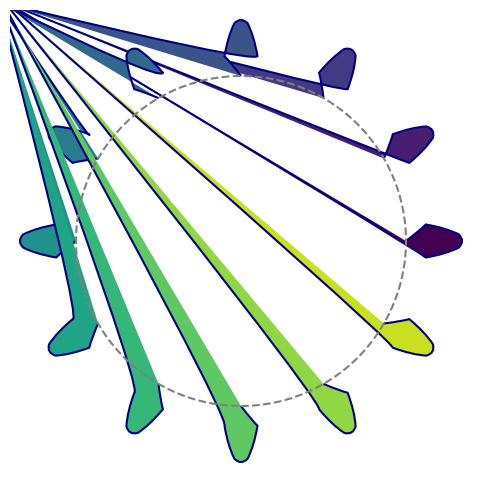

In [4]:
import matplotlib.pyplot as plt
from matplotlib.path import Path
import matplotlib.patches as patches
import numpy as np

def create_fish(scale=1.0, rotation=0, translation=(0,0), color='deepskyblue'):
    """Return a PathPatch of a stylized Escher fish."""
    # Base fish outline
    verts = np.array([
        (0.0, 0.0), (0.2, 0.15), (0.3, 0.25),
        (0.6, 0.2), (0.8, 0.1), (0.9, 0.0),
        (0.8, -0.1), (0.6, -0.2), (0.3, -0.25),
        (0.2, -0.15), (0.0, 0.0)
    ])
    codes = [
        Path.MOVETO, Path.CURVE3, Path.CURVE3, Path.CURVE3,
        Path.CURVE3, Path.CURVE3, Path.CURVE3, Path.CURVE3,
        Path.CURVE3, Path.CURVE3, Path.CLOSEPOLY
    ]

    # Scale
    verts *= scale

    # Rotate
    theta = np.deg2rad(rotation)
    rot = np.array([[np.cos(theta), -np.sin(theta)],
                    [np.sin(theta),  np.cos(theta)]])
    verts = verts @ rot.T

    # Translate
    verts += np.array(translation)

    # Create path and patch
    path = Path(verts, codes)
    patch = patches.PathPatch(path, facecolor=color, edgecolor='navy', lw=1.5)
    return patch

# --- Draw circular arrangement ---
fig, ax = plt.subplots(figsize=(6,6))

num_fish = 12
radius = 2.5

for i in range(num_fish):
    angle = 360 * i / num_fish
    # Place fish head outward around the circle
    x = radius * np.cos(np.deg2rad(angle))
    y = radius * np.sin(np.deg2rad(angle))
    fish = create_fish(scale=1.0, rotation=angle, translation=(x, y),
                       color=plt.cm.viridis(i / num_fish))
    ax.add_patch(fish)

# Add central circle to mimic Escher's composition
circle = plt.Circle((0,0), radius, fill=False, lw=1.5, color='gray', linestyle='--')
ax.add_artist(circle)

ax.set_xlim(-3.5, 3.5)
ax.set_ylim(-3.5, 3.5)
ax.set_aspect('equal')
ax.axis('off')
plt.show()
